In [1]:
%matplotlib inline
from collections import Counter
import glob
from itertools import groupby
import os

from IPython.core.display import HTML
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as mpl
import pandas as pd
import screed
from scipy.stats import ks_2samp
import seaborn as sns

from clipper.src import CLIP_analysis
from clipper.src import kmerdiff
from gscripts.general import dataviz

img_dir = "/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"
imp_dir = "/nas3/gpratt/Dropbox/IMP_team/rbns_figures/"

In [2]:
name_map = {"taf15": "TAF15",
           "fus": "FUS",
           "tdp43": "TDP43"}
color_map = {"fus": '#43A247',
              'taf15': '#DB1D3D',
              'tdp43': '#712878',
              'fus_taf15': 'c',
              'taf15_tdp43': 'c'}

In [3]:
def move_name(interval):
    interval.name = interval[12]
    return interval

def move_name_eric(interval):
    interval.name = interval[9]
    return interval

def trim_intervals(interval):
    return pybedtools.interval_constructor(interval[:6])

In [128]:
mv /nas3/gpratt/ENCFF194JNW.tsv .

In [8]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/RBNS/igf2bp1_enrichment_R.6mers.csv .
!scp tscc-login.sdsc.edu:/home/gpratt/projects/encode/analysis/encode_v4/Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed .
    
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_Stefan_Input_040915_GAGATTCC-ATAGAGGC_R2.unassigned.polyATrim.adapterTrim.adapterTrim.round2.rmRep.rmDup.sorted.bam_basedon_Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed_l2inputnormnew.2_l2foldenr.2_l10pval.bed igf2bp1_better_peaks.bed
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_Stefan_Input_040915_GAGATTCC-ATAGAGGC_R2.unassigned.polyATrim.adapterTrim.adapterTrim.round2.rmRep.rmDup.sorted.bam_basedon_Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed_l2inputnormnew.4_l2foldenr.5_l10pval.bed igf2bp1_highly_enrcihed_peaks.bed

igf2bp1_enrichment_R.6mers.csv                100%  197KB 197.4KB/s   00:00    
Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed 100% 8282KB   8.1MB/s   00:00    
Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_St 100% 1388KB   1.4MB/s   00:00    
Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_St 100%  205KB 204.9KB/s   00:00    


In [63]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_all.bed . 
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_l10p2_l2fc0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_l10p5_l2fc1.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_l10p5_l2fc4.bed .

S02S05_overlapping.peaks.bed.S02S05_all.bed   100% 4483KB   4.4MB/s   00:00    
S02S05_overlapping.peaks.bed.S02S05_l10p2_l2f 100%  610KB 610.4KB/s   00:00    
S02S05_overlapping.peaks.bed.S02S05_l10p5_l2f 100%  239KB 239.2KB/s   00:00    
S02S05_overlapping.peaks.bed.S02S05_l10p5_l2f 100%   63KB  62.6KB/s   00:00    


In [216]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed .

Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100% 4979KB   4.9MB/s   00:01    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  787KB 786.9KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  716KB 715.6KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  121KB 120.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100% 3364KB   3.3MB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%  495KB 494.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%   54KB  54.3KB/s   00:00    


In [181]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed . 
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed .

Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100% 4979KB   4.9MB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  787KB 786.9KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  716KB 715.6KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  121KB 120.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100% 3364KB   3.3MB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%  495KB 494.9KB/s   00:01    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%   54KB  54.3KB/s   00:00    


In [244]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_0_l2f_-99.bed . 
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_5_l2f_4.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_5_l2f_1.bed . 
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_5_l2f_4.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_5_l2f_0.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_5_l2f_4.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_5_l2f_3.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.INVERSE_l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.INVERSE_l10_5_l2f_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.INVERSE_l10_0_l2f_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_0_l2f_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_5_l2f_3.bed . 

scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_0_l2f_-99.bed: No such file or directory
scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_5_l2f_1.bed: No such file or directory
scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_5_l2f_4.bed: No such file or directory
scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_0_l2f_-99.bed: No such file or directory
scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_5_l2f_1.bed: No such file or directory
scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_5_l2f_4.bed: No such file or directory
scp: /home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S01_01_overlapped_with_S05_01.l10_5_l2f_0.bed: No such file o

In [316]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.INVERSE_l10_0_l2f_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_5_l2f_3.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01_overlapped_with_S01_01.l10_0_l2f_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.INVERSE_l10_0_l2f_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_5_l2f_3.bed .
    
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.INVERSE_l10p_0_l2fc_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.INVERSE_l10p_5_l2fc_3.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_0_l2fc_0.bed .

S05_01_overlapped_with_S01_01.INVERSE_l10_0_l 100% 3913KB   3.8MB/s   00:00    
S05_01_overlapped_with_S01_01.l10_0_l2f_-99.b 100% 3043KB   3.0MB/s   00:00    
S05_01_overlapped_with_S01_01.l10_5_l2f_3.bed 100%  140KB 139.8KB/s   00:00    
S05_01_overlapped_with_S01_01.l10_0_l2f_0.bed 100% 2693KB   2.6MB/s   00:00    
S06_01_overlapped_with_S03_01.INVERSE_l10_0_l 100% 2771KB   2.7MB/s   00:00    
S06_01_overlapped_with_S03_01.l10_0_l2f_-99.b 100% 2191KB   2.1MB/s   00:00    
S06_01_overlapped_with_S03_01.l10_5_l2f_3.bed 100%  104KB 104.2KB/s   00:00    
S05_01.basedon_S05_01.peaks.l2inputnormnew.be 100%  512KB 511.6KB/s   00:00    
S05_01.basedon_S05_01.peaks.l2inputnormnew.be 100% 4929KB   4.8MB/s   00:00    
S05_01.basedon_S05_01.peaks.l2inputnormnew.be 100%  406KB 406.2KB/s   00:00    
S05_01.basedon_S05_01.peaks.l2inputnormnew.be 100% 4823KB   4.7MB/s   00:00    


In [46]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/S06_01_overlapped_with_S03_01.l10_0_l2f_0.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_0_l2fc_0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .


S06_01_overlapped_with_S03_01.l10_0_l2f_0.bed 100% 2011KB   2.0MB/s   00:00    
EV71-2_01.basedon_EV71-2_01.peaks.l2inputnorm 100% 1595KB   1.6MB/s   00:00    
EV71-2_01.basedon_EV71-2_01.peaks.l2inputnorm 100%  195KB 195.0KB/s   00:00    


In [55]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/Lab_datasets_20151122/*l2inputnormnew.bed.compressed.bed .

FM01_01.basedon_FM01_01.peaks.l2inputnormnew. 100% 1146KB   1.1MB/s   00:00    
FM02_01.basedon_FM02_01.peaks.l2inputnormnew. 100% 1444KB   1.4MB/s   00:00    
FM03_01.basedon_FM03_01.peaks.l2inputnormnew. 100% 1606KB   1.6MB/s   00:01    
FM04_01.basedon_FM04_01.peaks.l2inputnormnew. 100% 1686KB   1.7MB/s   00:00    
FM05_01.basedon_FM05_01.peaks.l2inputnormnew. 100% 1258KB   1.2MB/s   00:00    
FM06_01.basedon_FM06_01.peaks.l2inputnormnew. 100% 1373KB   1.3MB/s   00:00    


In [116]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_v8_20151120/EV20_01.basedon_EV20_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/205_01.basedon_205_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/220_01.basedon_220_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/279_01.basedon_279_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/Method_paper_finalALLRERUN_102615/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed .

EV20_01.basedon_EV20_01.peaks.l2inputnormnew. 100% 1491     1.5KB/s   00:00    
205_01.basedon_205_01.peaks.l2inputnormnew.be 100%  197KB 197.2KB/s   00:00    
220_01.basedon_220_01.peaks.l2inputnormnew.be 100%  460KB 460.4KB/s   00:00    
279_01.basedon_279_01.peaks.l2inputnormnew.be 100%  309KB 309.3KB/s   00:00    
EV42_01.basedon_EV42_01.peaks.l2inputnormnew. 100%  344KB 343.5KB/s   00:00    


In [ ]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_bed.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_bed.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_bed.l10_5_l2f_4.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_bed.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_bed.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_bed.l10_5_l2f_4.bed .
    
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/363_01.basedon_363_01.peaks.l2inputnormnew.bed.compressed.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/363_02.basedon_363_02.peaks.l2inputnormnew.bed.compressed.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/386_01.basedon_386_01.peaks.l2inputnormnew.bed.compressed.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_v8_20151112/386_02.basedon_386_02.peaks.l2inputnormnew.bed.compressed.bed .


#Calculate z-scores from bind-n-seq

In [4]:
def calculate_z_score(rbns):
    
    #get the most enriched column
    max_column = rbns.max()
    max_column = max_column[max_column == max_column.max()].index[0]
    
    mean = rbns[max_column].mean()
    std  = rbns[max_column].std()

    zscore = rbns[max_column].apply(lambda x: (x - mean) / std)
    return zscore

In [91]:
taf15 = pd.read_table("ENCFF796QEY.tsv", index_col=0)
fus = pd.read_table("/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/FUS_enrichment_R.6mers.txt", index_col=0)
igf2bp1 = pd.read_table("igf2bp1_enrichment_R.6mers.csv", index_col=0).dropna()
igf2bp2 = pd.read_table("ENCFF359JRV.tsv", index_col=0)
hnrnpa2b1 = pd.read_csv("/nas3/gpratt/projects/hnrnpa2b1/analysis/rbns/hnRNPA2B1_enrichment_R.6mers.csv", index_col=0)
rbfox2 = pd.read_table("ENCFF002DFF.tsv", index_col=0)

In [92]:
fus_zscore =  calculate_z_score(fus)
taf15_zscore = calculate_z_score(taf15)
igf2bp1_zscore = calculate_z_score(igf2bp1)
igf2bp2_zscore = calculate_z_score(igf2bp2)
hnrnpa2b1_zscore = calculate_z_score(hnrnpa2b1)
rbfox2_zscore = calculate_z_score(rbfox2)

#Calculate CLIP-seq Enrichment

In [141]:
regions, all_regions = CLIP_analysis.regions_generator()

genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/mm9_genes.bed")

rbps = {"taf15": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TAF15_WholeBrain.merged.peaks.kasey.bed"),
        'tdp43': pybedtools.BedTool("/nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TDP43_WholeBrain.merged.peaks.kasey.bed"),
        'fus': pybedtools.BedTool("/nas3/gpratt/projects/fet_family/analysis/mouse_clip_v5/TLS_WholeBrain.merged.peaks.kasey.bed"),}

# rbps = {"taf15": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed"),
#         "fus": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed"),
#         "tdp43": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed"),
#        }

assigned_rbps_mouse = {}
for name, rbp in rbps.items():
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(move_name).saveas()

    assigned_rbps_mouse[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="mm9")

There are a total 68407 clusters I'll examine
For region: cds found 313 that overlap and 68094 that don't
For region: three_prime_utrs found 2783 that overlap and 65311 that don't
For region: five_prime_utrs found 196 that overlap and 65115 that don't
For region: proxintron500 found 9222 that overlap and 55893 that don't
For region: distintron500 found 55824 that overlap and 69 that don't
After assigning 69 un-categorized regions
There are a total 2951 clusters I'll examine
For region: cds found 131 that overlap and 2820 that don't
For region: three_prime_utrs found 615 that overlap and 2205 that don't
For region: five_prime_utrs found 17 that overlap and 2188 that don't
For region: proxintron500 found 484 that overlap and 1704 that don't
For region: distintron500 found 1685 that overlap and 19 that don't
After assigning 19 un-categorized regions
There are a total 22412 clusters I'll examine
For region: cds found 2277 that overlap and 20135 that don't
For region: three_prime_utrs found

In [217]:
regions, all_regions = CLIP_analysis.regions_generator()

genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/hg19_genes.bed")





rbps = {"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed"),
"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed"),
"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed"),
"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed"),
"Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed": pybedtools.BedTool("Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed"),
"Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed": pybedtools.BedTool("Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed"),
"Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed": pybedtools.BedTool("Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed"),

       }

assigned_rbps = {}
for name, rbp in rbps.items():
    if name == "igf2bp1":
        tmp_move_name = move_name_eric
    else:
        tmp_move_name = move_name
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(tmp_move_name).each(trim_intervals).saveas()

    assigned_rbps[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="hg19")

Not Valid bed12 file, continuing processing, some things may be strange
There are a total 5454 clusters I'll examine
For region: cds found 1353 that overlap and 4101 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: three_prime_utrs found 3806 that overlap and 295 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: five_prime_utrs found 35 that overlap and 260 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 62 that overlap and 198 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: distintron500 found 159 that overlap and 39 that don't
Not Valid bed12 file, continuing processing, some things may be strange
After assigning 39 un-categorized regions
Not Valid bed12 file, continuing processing, some things may be strange
There are a total 7877 clusters I'll examine
For region: cds found 2111 th

In [ ]:
regions, all_regions = CLIP_analysis.regions_generator()

genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/hg19_genes.bed")


rbps = { "S05_01_overlapped_with_S01_01.l10_0_l2f_-99.bed": pybedtools.BedTool("S05_01_overlapped_with_S01_01.l10_0_l2f_-99.bed"),
        "S05_01_overlapped_with_S01_01.l10_5_l2f_1.bed": pybedtools.BedTool("S05_01_overlapped_with_S01_01.l10_5_l2f_1.bed"),
        "S05_01_overlapped_with_S01_01.l10_5_l2f_4.bed": pybedtools.BedTool("S05_01_overlapped_with_S01_01.l10_5_l2f_4.bed"),
        "S06_01_overlapped_with_S03_01.l10_0_l2f_-99.bed": pybedtools.BedTool("S06_01_overlapped_with_S03_01.l10_0_l2f_-99.bed"),
        "S06_01_overlapped_with_S03_01.l10_5_l2f_1.bed": pybedtools.BedTool("S06_01_overlapped_with_S03_01.l10_5_l2f_1.bed"),
        "S06_01_overlapped_with_S03_01.l10_5_l2f_4.bed": pybedtools.BedTool("S06_01_overlapped_with_S03_01.l10_5_l2f_4.bed"),
        "S01_01_overlapped_with_S05_01.l10_5_l2f_3.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_5_l2f_3.bed"),
        "S01_01_overlapped_with_S05_01.l10_5_l2f_0.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_5_l2f_0.bed"),
        "S01_01_overlapped_with_S05_01.l10_0_l2f_-99.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_0_l2f_-99.bed"),
        "S01_01_overlapped_with_S05_01.l10_5_l2f_1.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_5_l2f_1.bed"),
        "S01_01_overlapped_with_S05_01.l10_5_l2f_4.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_5_l2f_4.bed"),
        "S01_01_overlapped_with_S05_01.l10_5_l2f_3.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_5_l2f_3.bed"),
        "S01_01_overlapped_with_S05_01.INVERSE_l10_5_l2f_1.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.INVERSE_l10_5_l2f_1.bed"),
        "S01_01_overlapped_with_S05_01.INVERSE_l10_5_l2f_0.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.INVERSE_l10_5_l2f_0.bed"),
        "S01_01_overlapped_with_S05_01.INVERSE_l10_0_l2f_0.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.INVERSE_l10_0_l2f_0.bed"),
        "S01_01_overlapped_with_S05_01.l10_0_l2f_0.bed": pybedtools.BedTool("S01_01_overlapped_with_S05_01.l10_0_l2f_0.bed"),
       }

reprocessed_rbps = {}
for name, rbp in rbps.items():
    if name == "igf2bp1":
        tmp_move_name = move_name_eric
    else:
        tmp_move_name = move_name
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(tmp_move_name).each(trim_intervals).saveas()

    reprocessed_rbps[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="hg19")

Not Valid bed12 file, continuing processing, some things may be strange
There are a total 1036 clusters I'll examine
For region: cds found 257 that overlap and 779 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: three_prime_utrs found 517 that overlap and 262 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: five_prime_utrs found 12 that overlap and 250 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 82 that overlap and 168 that don't
For region: five_prime_utrs found 2953 that overlap and 9005 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 3444 that overlap and 5561 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: distintron500 found 4683 that overlap and 878 that don't
Not Valid bed12 file, continuing processing, so

In [131]:
regions, all_regions = CLIP_analysis.regions_generator()

genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/hg19_genes.bed")

rbps = """S05_01_overlapped_with_S01_01.INVERSE_l10_0_l2f_0.bed
S05_01_overlapped_with_S01_01.l10_0_l2f_-99.bed
S05_01_overlapped_with_S01_01.l10_5_l2f_3.bed
S05_01_overlapped_with_S01_01.l10_0_l2f_0.bed
S06_01_overlapped_with_S03_01.INVERSE_l10_0_l2f_0.bed
S06_01_overlapped_with_S03_01.l10_0_l2f_-99.bed
S06_01_overlapped_with_S03_01.l10_5_l2f_3.bed
S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.INVERSE_l10p_0_l2fc_0.bed
S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.INVERSE_l10p_5_l2fc_3.bed
S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_0_l2fc_0.bed
S06_01_overlapped_with_S03_01.l10_0_l2f_0.bed
EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_0_l2fc_0.bed
EV71-2_01.basedon_EV71-2_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
EV20_01.basedon_EV20_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
205_01.basedon_205_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
220_01.basedon_220_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
279_01.basedon_279_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
""".split()

rbps = {rbp: pybedtools.BedTool(rbp) for rbp in rbps}

reprocessed_rbps = {}
for name, rbp in rbps.items():
    if name == "igf2bp1":
        tmp_move_name = move_name_eric
    else:
        tmp_move_name = move_name
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(tmp_move_name).each(trim_intervals).saveas()

    reprocessed_rbps[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="hg19")

Not Valid bed12 file, continuing processing, some things may be strange
There are a total 6022 clusters I'll examine
For region: cds found 3004 that overlap and 3018 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: three_prime_utrs found 2725 that overlap and 293 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: five_prime_utrs found 71 that overlap and 222 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 74 that overlap and 148 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: distintron500 found 117 that overlap and 31 that don't
Not Valid bed12 file, continuing processing, some things may be strange
After assigning 31 un-categorized regions
Not Valid bed12 file, continuing processing, some things may be strange
There are a total 11005 clusters I'll examine
For region: cds found 5327 t

In [ ]:

# rbps = {'363_01.basedon_363_01.peaks.l2inputnormnew.bed.compressed.bed': 34,
#  '363_02.basedon_363_02.peaks.l2inputnormnew.bed.compressed.bed': 43,
#  '386_01.basedon_386_01.peaks.l2inputnormnew.bed.compressed.bed': 16,
#  '386_02.basedon_386_02.peaks.l2inputnormnew.bed.compressed.bed': 33,
#  'FM01_01.basedon_FM01_01.peaks.l2inputnormnew.bed.compressed.bed': 23,
#  'FM02_01.basedon_FM02_01.peaks.l2inputnormnew.bed.compressed.bed': 23,
#  'FM03_01.basedon_FM03_01.peaks.l2inputnormnew.bed.compressed.bed': 28,
#  'FM04_01.basedon_FM04_01.peaks.l2inputnormnew.bed.compressed.bed': 22,
#  'FM05_01.basedon_FM05_01.peaks.l2inputnormnew.bed.compressed.bed': 1,
#  'FM06_01.basedon_FM06_01.peaks.l2inputnormnew.bed.compressed.bed': 1}

# genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/hg19_genes.bed")
# rbps = {rbp: pybedtools.BedTool(rbp) for rbp in rbps}


# hnrnpa2b1_hg19_assigned = {}
# for name, rbp in rbps.items():
#     tmp_move_name = move_name
#     overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(tmp_move_name).each(trim_intervals).saveas()

#     hnrnpa2b1_hg19_assigned[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
#                                     regions, "assigned", nrand=10, species="hg19")

Not Valid bed12 file, continuing processing, some things may be strange
There are a total 28590 clusters I'll examine
For region: cds found 4796 that overlap and 23794 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: three_prime_utrs found 5257 that overlap and 18537 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: five_prime_utrs found 1001 that overlap and 17536 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 7263 that overlap and 10273 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: distintron500 found 9647 that overlap and 626 that don't
Not Valid bed12 file, continuing processing, some things may be strange
After assigning 626 un-categorized regions
Not Valid bed12 file, continuing processing, some things may be strange
There are a total 33775 clusters I'll examine
For region: c

In [153]:
!cp /nas3/gpratt/projects/hnrnpa2b1/analysis/hnrnpa2b1_iclip_v1/2_NoIndex_L002_R1.R16.polyATrim.adapterTrim.rmRep.rg.sorted.rmDup.sorted.peaks.bed .

In [154]:
genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/mm9_genes.bed")

rbps = """2_NoIndex_L002_R1.R16.polyATrim.adapterTrim.rmRep.rg.sorted.rmDup.sorted.peaks.bed""".split()

rbps = {rbp: pybedtools.BedTool(rbp) for rbp in rbps}

hnrnpa2b1_assigned = {}
for name, rbp in rbps.items():
    if name == "igf2bp1":
        tmp_move_name = move_name_eric
    else:
        tmp_move_name = move_name
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(tmp_move_name).each(trim_intervals).saveas()

    hnrnpa2b1_assigned[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="mm9")

Not Valid bed12 file, continuing processing, some things may be strange
There are a total 1415 clusters I'll examine
For region: cds found 54 that overlap and 1361 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: three_prime_utrs found 882 that overlap and 479 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: five_prime_utrs found 14 that overlap and 465 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 105 that overlap and 360 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: distintron500 found 243 that overlap and 117 that don't
Not Valid bed12 file, continuing processing, some things may be strange
After assigning 117 un-categorized regions


In [155]:
# for name in assigned_rbps:
#     CLIP_analysis.make_fasta_files_from_regions(assigned_rbps[name], name, "fasta", "/nas3/yeolab/Genome/ucsc/hg19/chromosomes/all.fa")

for name in reprocessed_rbps:
    CLIP_analysis.make_fasta_files_from_regions(reprocessed_rbps[name], name, "fasta", "/nas3/yeolab/Genome/ucsc/hg19/chromosomes/all.fa")

for name in hnrnpa2b1_assigned:
    CLIP_analysis.make_fasta_files_from_regions(hnrnpa2b1_assigned[name], name, "fasta", "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")

for name in assigned_rbps_mouse:
    CLIP_analysis.make_fasta_files_from_regions(assigned_rbps_mouse[name], name, "fasta", "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")

In [156]:
def kmer_enrichment(header):
    fasta_files = glob.glob("fasta/{}.*.fa".format(header))
    kmers = {}
    for group, lst in groupby(sorted(fasta_files), key=lambda x: os.path.basename(x).split(".")[-3]):
        lst = list(lst)
        if len(lst) != 2:
            print group
            print "bad length, continuing", group
            continue

        random, real = lst
        kmer = kmerdiff.kmer_diff(real, random, 6)
        kmer = pd.DataFrame(kmer[0]).T
        kmer.columns = ['freq1', 'freq2', 'delta']
        kmer.index.name = "kmer"
        kmers[group] = kmer
    return pd.concat(kmers)

In [157]:
# kmer_dict = {}
# for name in assigned_rbps:
#     kmer_dict[name] = kmer_enrichment(name)
    
reprocessed_kmer_dict = {}
for name in reprocessed_rbps:
    reprocessed_kmer_dict[name] = kmer_enrichment(name)

print "starting hnrnpa2b1"
hnrnpa2b1_kmer_dict = {}
for name in hnrnpa2b1_assigned:
    hnrnpa2b1_kmer_dict[name] = kmer_enrichment(name)

kmer_dict_mouse = {}
for name in assigned_rbps_mouse:
    kmer_dict_mouse[name] = kmer_enrichment(name)

uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
uncatagorized
bad length, continuing uncatagorized
starting hnrnpa2b1
uncatagorize

#Plot the comparison between the two

In [158]:
sns.set(style="ticks")

In [159]:
def plot_bindnseq(zscore, kmer, img_path, motifs=["GGTA"], name="", colors=None, ylim=None):
    num_rows = 4
    num_cols = 4
    
    if type(motifs) == str:
        color = ['r']
        motifs = [motifs]
        
    with dataviz.Figure(img_path, figsize=(3.0, 3.0)) as fig:
        gs = gridspec.GridSpec(num_rows, num_cols)

        joined = pd.concat([kmer.delta, zscore], axis=1)
        joined.columns = ['kmer', 'rbns']
        
        ax = fig.add_subplot(gs[0, 0:3])

        sns.kdeplot(joined['rbns'], ax=ax, color='k')
        for motif, color in zip(motifs, colors):
            filtered = joined[[motif in item for item in joined.index]]

            sns.kdeplot(filtered['rbns'], ax=ax, color=color)
            ax.text(.8, 1, "p-val {:.2}".format(ks_2samp(joined['rbns'], filtered['rbns'])[1]),
                    transform=ax.transAxes, fontsize=8, color=color)

        legend = ax.legend()
        legend.remove()
        ax.set_yticks([])
        ax.set_xticks([])
        sns.despine(ax=ax, left=True)
        [tick.set_fontsize(8) for tick in ax.get_xticklabels()]

        ax = fig.add_subplot(gs[1:4, 3])
        sns.kdeplot(joined['kmer'], ax=ax, vertical=True, color='k')
        for motif, color in zip(motifs, colors):
            filtered = joined[[motif in item for item in joined.index]]
            sns.kdeplot(filtered['kmer'], ax=ax, vertical=True, color=color)
            ax.text(.1,.05, "p-val {:.2}".format(ks_2samp(joined['kmer'], filtered['kmer'])[1]),
                    transform=ax.transAxes, fontsize=8, color=color)

        ax.set_xticks([])
        ax.set_yticks([])
        legend = ax.legend()
        legend.remove()
        sns.despine(ax=ax, bottom=True)
        [tick.set_fontsize(8) for tick in ax.get_xticklabels()]
        if ylim is not None:
            ax.set_ylim((min(kmer.delta), ylim))
            
        ax = fig.add_subplot(gs[1:4,0:3])

        found_motifs = set([])
        for motif, color in zip(motifs, colors):
            pass
            filtered = joined[[motif in item for item in joined.index]]
            line2 = ax.scatter(filtered['rbns'], 
                               filtered['kmer'],
                               #alpha=.5, 
                               s=5, 
                               label="Contains {}".format(motif),
                               color=color,
                               linewidths=0,
                               #rasterized=True
                          )
            found_motifs = found_motifs.union(set(filtered.index))
        diff = joined.index.difference(found_motifs)
        
        other_motifs = joined.ix[diff]
        line1 = ax.scatter(other_motifs['rbns'], 
                           other_motifs['kmer'], 
                           #alpha=.5,
                           color='.01', 
                           s=1, 
                           label="Other", 
                           linewidths=0,
                           #rasterized=True
                          )
        
        if ylim is not None:
            ax.set_ylim((min(kmer.delta), ylim))
        ax.set_ylabel(name + "\nCLIP Cluster 6-mer Enrichment")
        lgnd = ax.legend(loc=4, scatterpoints=1, fontsize=8)
        #ax.set_xticks([])
        ax.set_xlabel(name + " RBNS R Z-Score")

        sns.despine(ax=ax)
        lgnd.legendHandles[0]._sizes = [30]
        lgnd.legendHandles[1]._sizes = [30]
        print ax.get_ylim()

def save_all_plots(kmer_dict, zscore, fn, name="", motifs="CACA", colors='r', img_dir="/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"):
    for region in kmer_dict.index.levels[0]:
        plot_bindnseq(zscore, kmer_dict.ix[region], os.path.join(img_dir,'{}_{}.svg'.format(region, fn)), motifs=motifs, name=name, colors=colors )

#Looking at FET Family

(-200.0, 1400.0)
(-10.0, 70.0)
(-200.0, 1200.0)
(-10.0, 80.0)
(-100.0, 500.0)
(-50.0, 200.0)
(-20.0, 30.0)
(-4.0, 10.0)
(-20.0, 25.0)
(-2.0, 7.0)
(-10.0, 15.0)
(-8.0, 10.0)
(-60.0, 60.0)
(-15.0, 15.0)
(-60.0, 80.0)
(-10.0, 15.0)
(-30.0, 30.0)
(-30.0, 40.0)


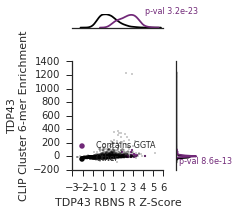

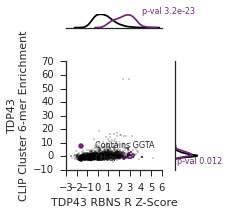

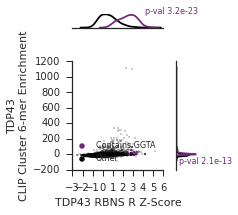

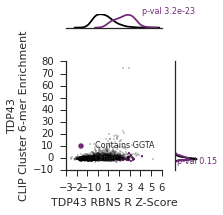

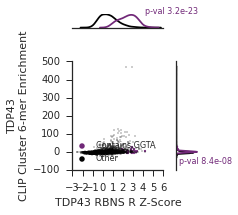

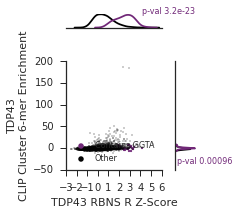

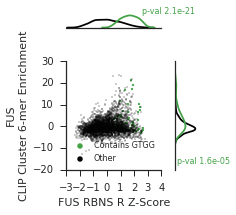

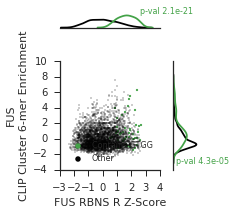

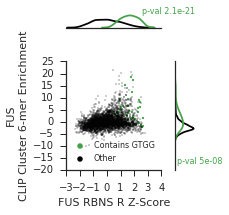

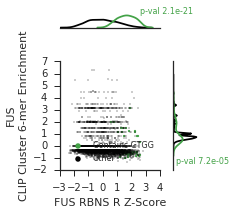

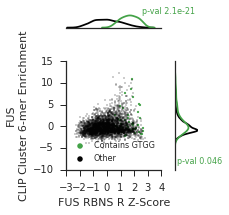

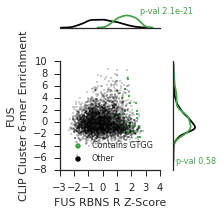

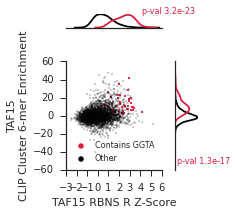

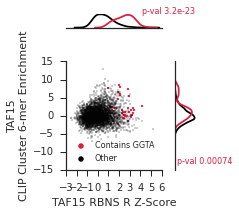

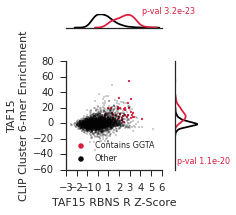

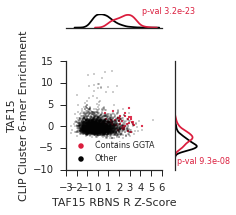

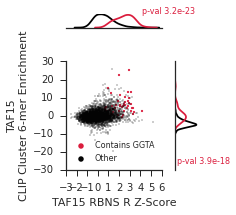

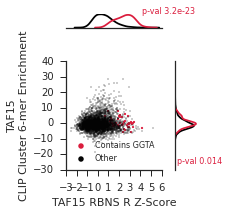

In [147]:
img_dir = "/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"
for name, kmers in kmer_dict_mouse.items():
    cur_zscore = fus_zscore if "fus" in name else taf15_zscore
    cur_motif = "GTGG" if "fus" in name else "GGTA"
    save_all_plots(kmers, cur_zscore, name, name_map[name], [cur_motif], [color_map[name]], img_dir=img_dir)

tdp43
(-200.0, 1400.0)
(-10.0, 70.0)
(-200.0, 1200.0)
(-10.0, 80.0)
(-100.0, 500.0)
(-50.0, 200.0)
fus
(-20.0, 30.0)
(-4.0, 10.0)
(-20.0, 25.0)
(-2.0, 7.0)
(-10.0, 15.0)
(-8.0, 10.0)
taf15
(-60.0, 60.0)
(-15.0, 15.0)
(-60.0, 80.0)
(-10.0, 15.0)
(-30.0, 30.0)
(-30.0, 40.0)


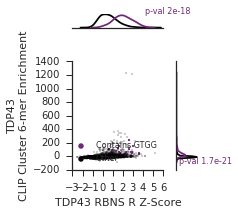

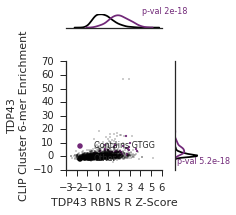

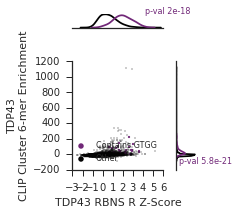

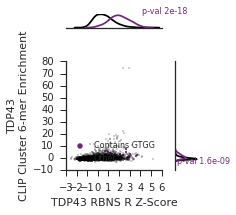

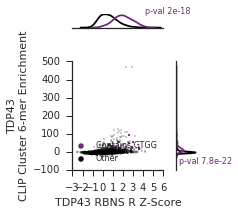

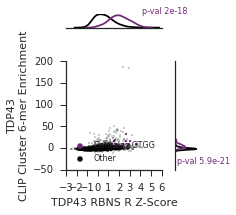

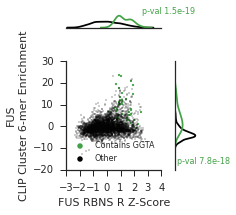

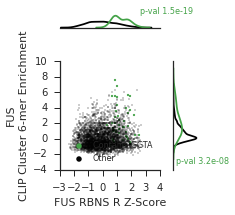

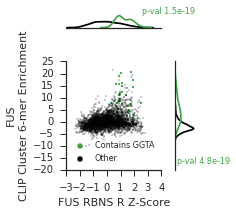

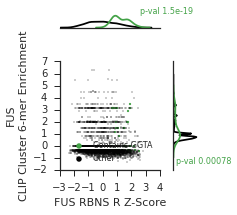

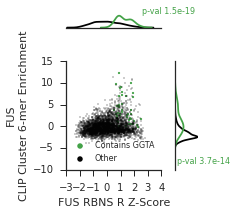

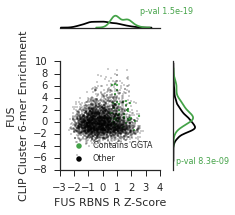

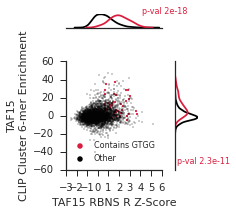

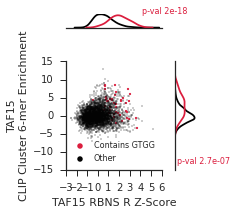

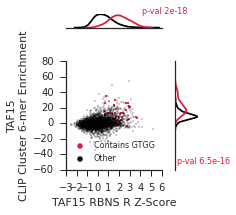

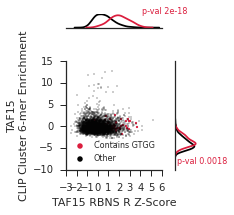

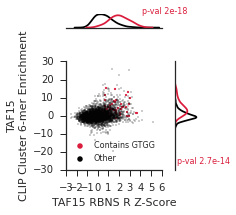

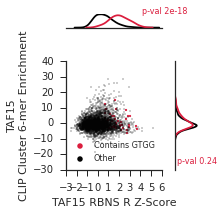

In [148]:
img_dir = "/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"
for name, kmers in kmer_dict_mouse.items():
    print name
    cur_zscore = fus_zscore if "fus" in name else taf15_zscore
    cur_motif = "GTGG" if "fus" not in name else "GGTA"

    save_all_plots(kmers, cur_zscore, name + "_reversed", name_map[name], [cur_motif], [color_map[name]], img_dir=img_dir)

#Looking at IGF2bp1

In [12]:
img_dir = "/nas3/gpratt/Dropbox/IMP_team/rbns_figures/"
for name, kmers in kmer_dict.items():
    print name
    cur_zscore = igf2bp1_zscore if "Imp1" in name else igf2bp2_zscore
    output_name = "Imp1" if "Imp1" in name else "Imp2"
    print "Imp1" in name
    save_all_plots(kmers, 
               cur_zscore,
               name,
               output_name,
               motifs=['CACA', 'TACA', 'AACA', 'CATA'], 
               colors=['#EB2526', '#3856A1', '#74CCD7', '#BA509B'], 
               img_dir=img_dir)

NameError: name 'kmer_dict' is not defined

something went wrong with 220_01.basedon_220_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
220_01.basedon_220_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed [igf2bp1]
(-30.0, 50.0)
(-25.0, 20.0)
(-10.0, 70.0)
(-5.0, 25.0)
(-10.0, 50.0)
(-20.0, 20.0)
something went wrong with 279_01.basedon_279_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed
279_01.basedon_279_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed [igf2bp1]
(-20.0, 25.0)
(-4.0, 8.0)
(-10.0, 15.0)
(-4.0, 12.0)
(-10.0, 20.0)
(-15.0, 15.0)
S05_01.basedon_S05_01.peaks.l2inputnormnew.bed.compressed.bed.INVERSE_l10p_0_l2fc_0.bed [igf2bp1]
(-30.0, 50.0)
(-20.0, 50.0)
(-15.0, 25.0)
(-15.0, 30.0)
(-15.0, 25.0)
(-10.0, 25.0)
S06_01_overlapped_with_S03_01.l10_0_l2f_0.bed [IGF2BP2]
(-50.0, 50.0)
(-30.0, 40.0)
(-10.0, 15.0)
(-10.0, 15.0)
(-10.0, 20.0)
(-40.0, 40.0)
EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed [FOX]
(-60.0, 120.0)
(-10.0, 25.0)
(-40.

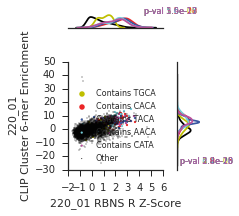

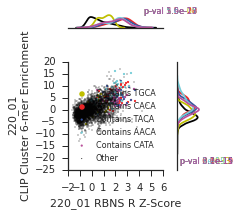

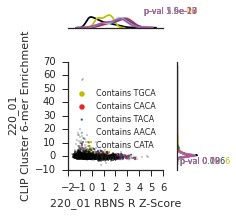

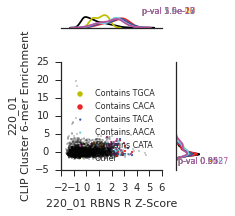

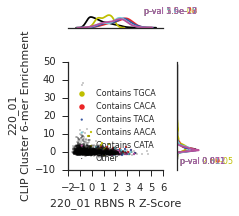

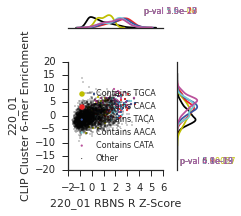

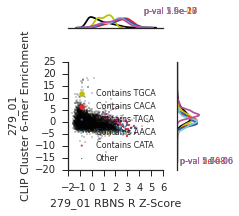

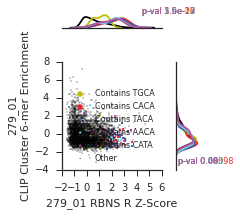

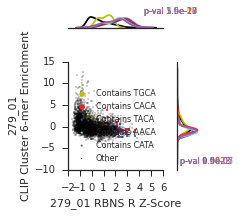

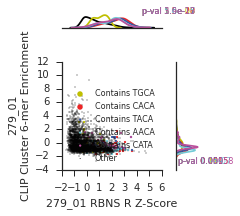

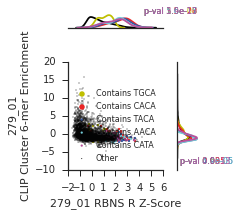

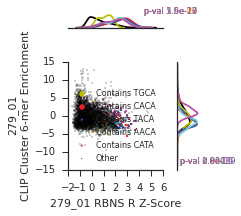

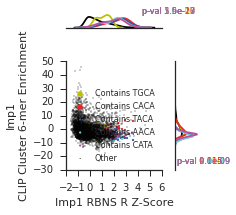

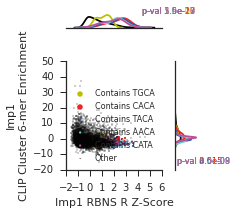

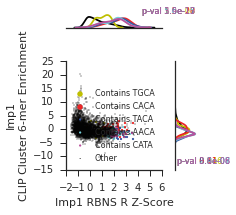

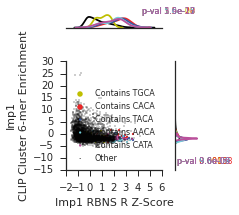

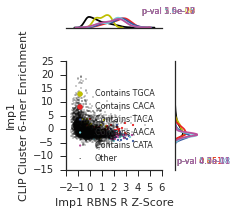

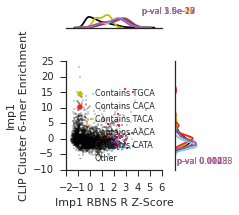

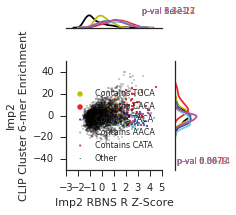

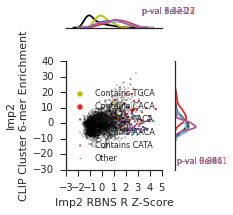

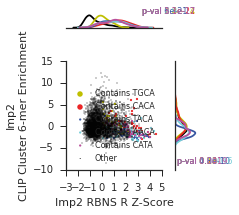

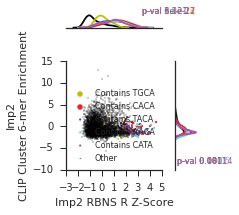

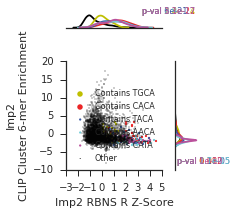

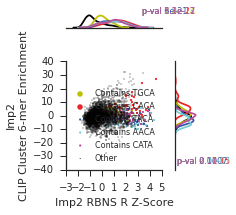

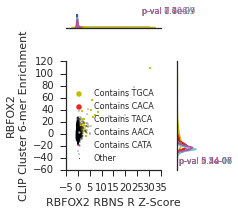

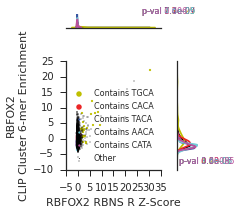

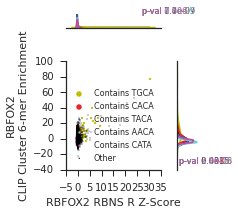

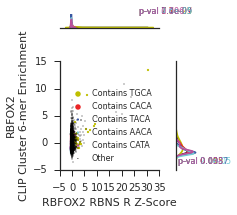

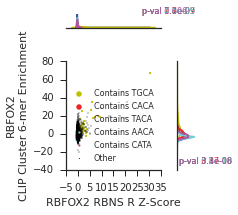

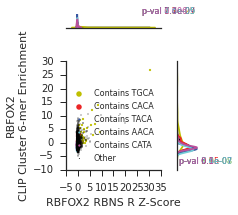

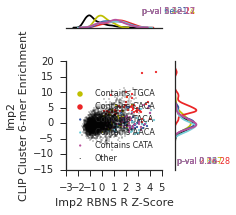

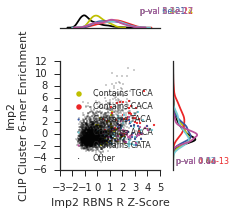

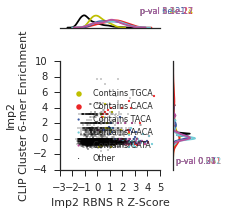

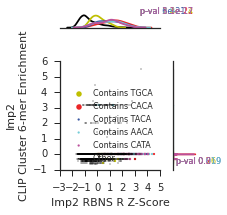

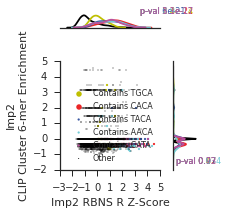

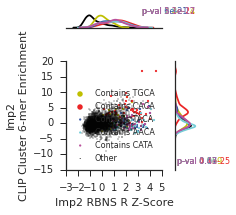

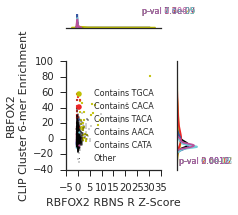

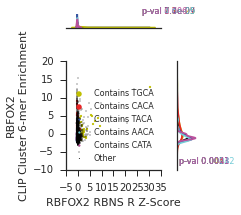

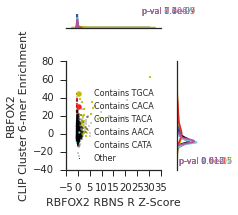

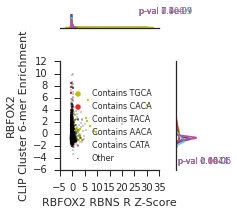

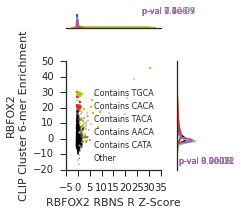

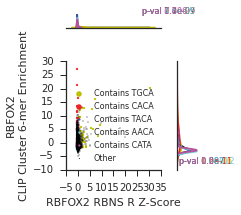

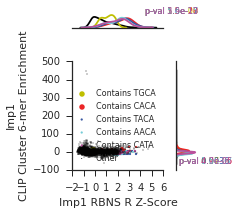

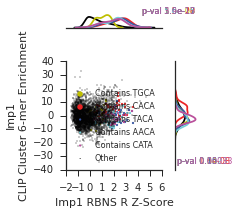

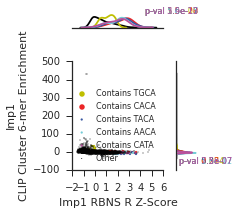

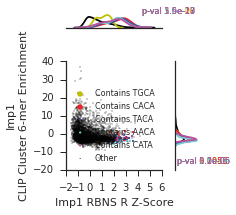

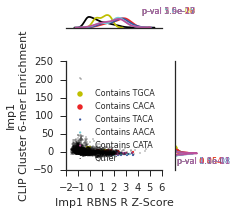

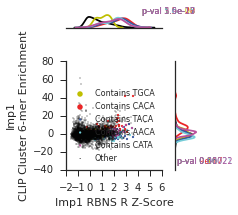

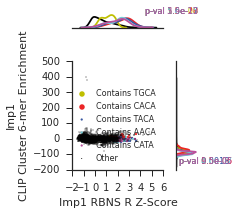

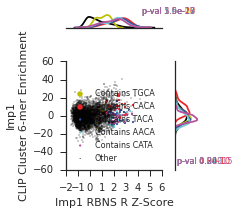

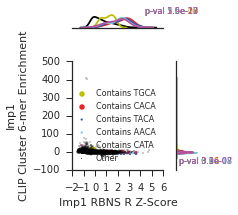

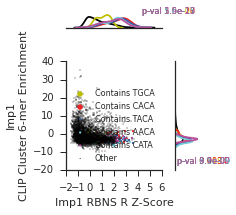

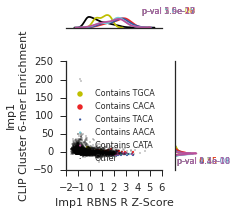

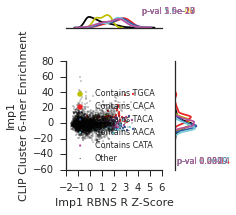

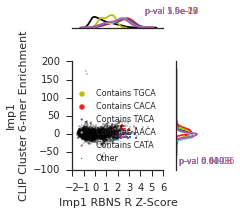

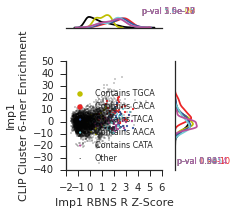

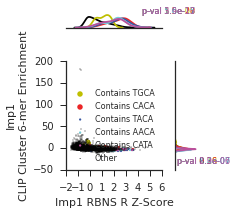

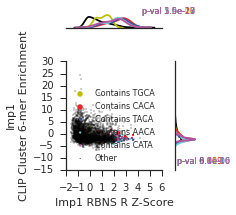

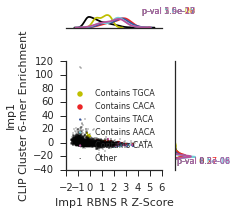

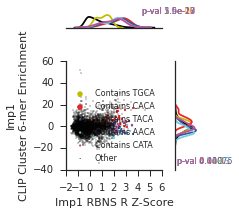

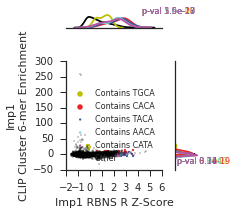

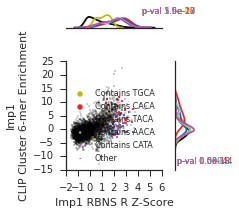

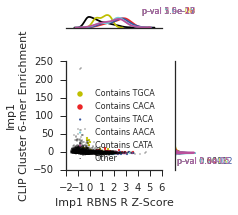

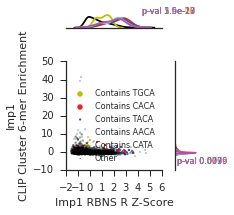

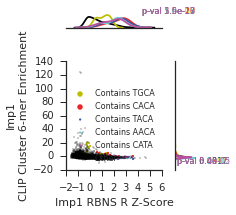

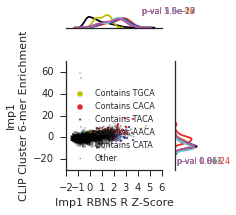

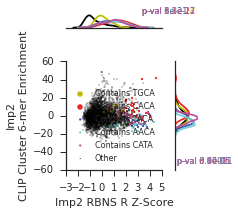

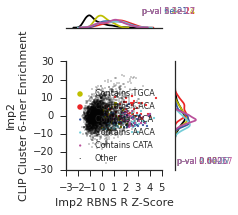

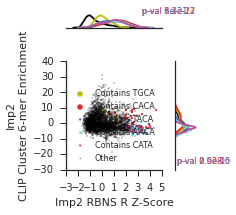

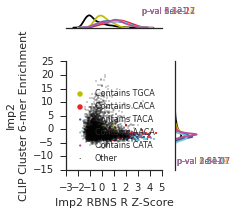

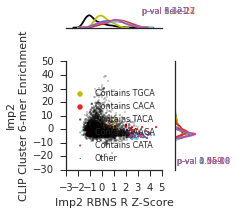

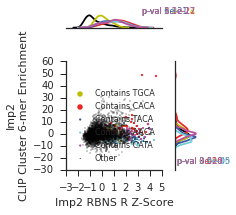

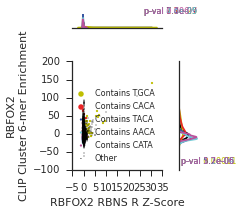

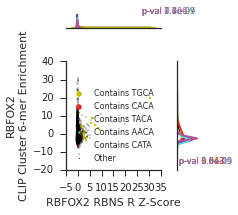

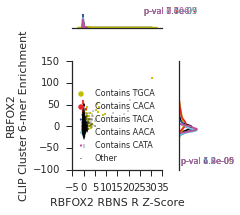

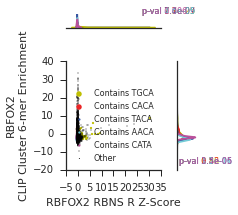

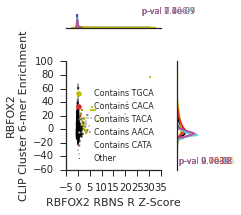

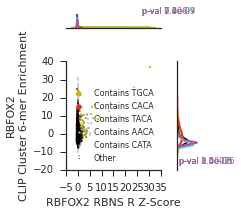

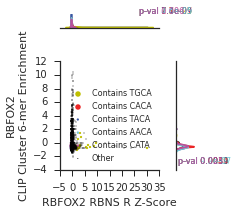

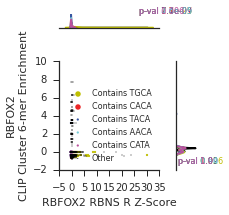

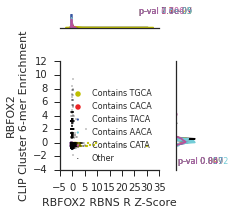

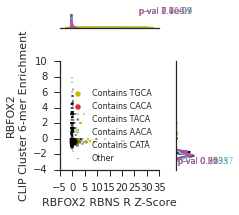

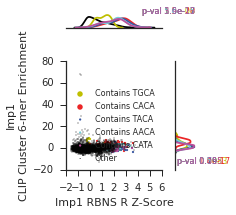

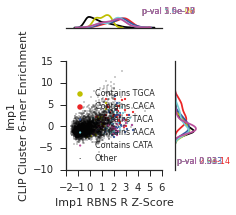

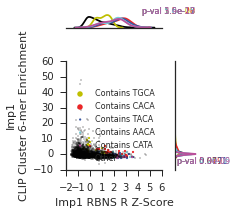

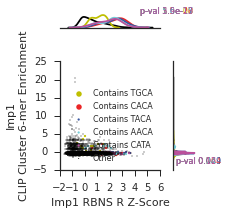

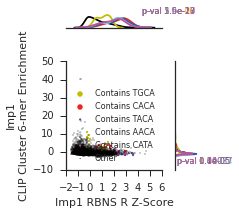

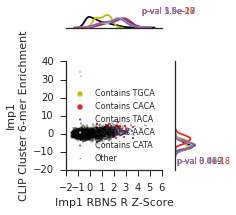

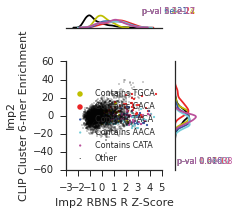

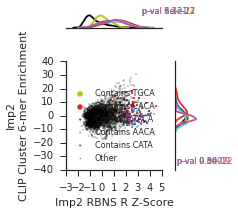

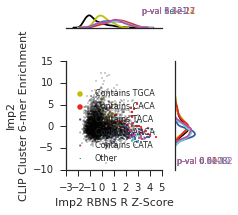

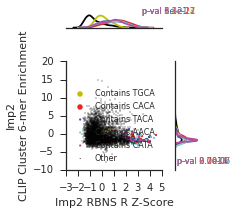

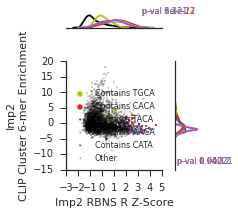

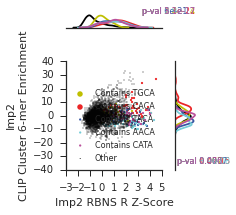

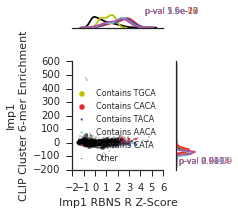

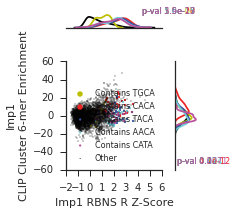

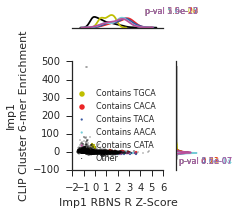

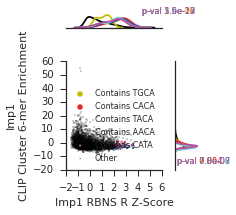

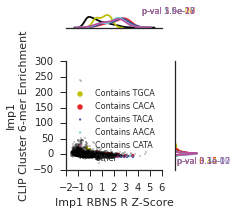

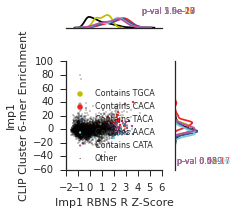

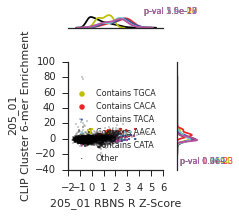

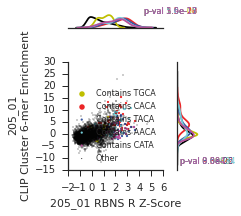

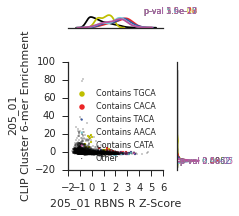

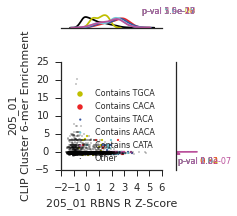

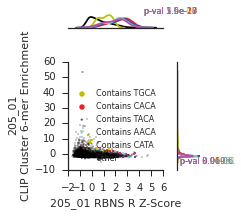

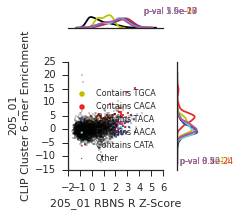

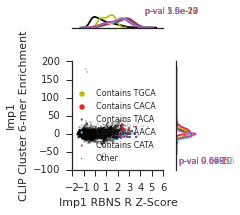

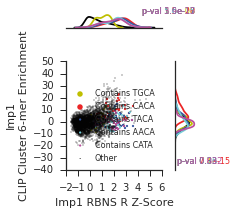

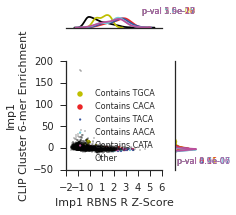

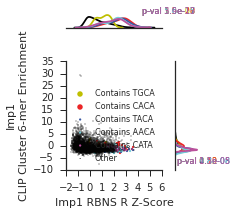

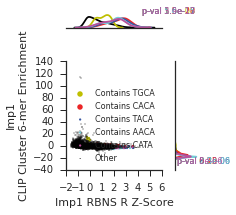

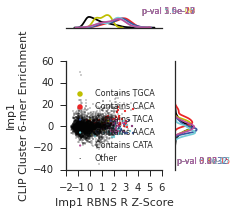

In [133]:
img_dir = "/nas3/gpratt/Dropbox/IMP_team/rbns_figures_v4/"
for name, kmers in reprocessed_kmer_dict.items():
    if "S05" in name or "S01" in name:
        output_name = "Imp1"
        cur_zscore = igf2bp1_zscore
    elif "S06" in name:
        output_name = "Imp2"
        cur_zscore = igf2bp2_zscore
    elif "EV" in name:
        output_name = "RBFOX2"
        cur_zscore = rbfox2_zscore
    else:
        output_name = name.split(".")[0]
        cur_zscore = igf2bp1_zscore
        print "something went wrong with", name
    #print "S05" in name
    print name, cur_zscore.index.name
    save_all_plots(kmers, 
               cur_zscore,
               name,
               output_name,
               motifs=['TGCA', 'CACA', 'TACA', 'AACA', 'CATA'], 
               colors=['y', '#EB2526', '#3856A1', '#74CCD7', '#BA509B'], 
               img_dir=img_dir)

(-8.7031332241617907, 8.0)


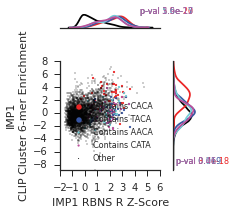

In [35]:
plot_bindnseq(igf2bp1_zscore, 
              reprocessed_kmer_dict['S05_01_overlapped_with_S01_01.l10_5_l2f_3.bed'].ix['three_prime_utrs'],
              os.path.join(img_dir,'{}_{}.svg'.format("three_prime_utrs", "bar")), 
              motifs=['CACA', 'TACA', 'AACA', 'CATA'], name="IMP1", 
              colors=['#EB2526', '#3856A1', '#74CCD7', '#BA509B'],
              ylim=8
             )

(-9.0507939690115755, 20.0)


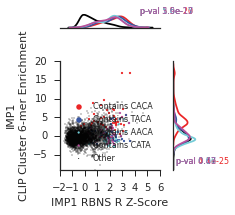

In [38]:
plot_bindnseq(igf2bp1_zscore, 
              reprocessed_kmer_dict['S06_01_overlapped_with_S03_01.l10_5_l2f_3.bed'].ix['three_prime_utrs'],
              os.path.join(img_dir,'{}_{}.svg'.format("three_prime_utrs", "S06_01_overlapped_with_S03_01.l10_5_l2f_3.fixed.bed")), 
              motifs=['CACA', 'TACA', 'AACA', 'CATA'], name="IMP1", 
              colors=['#EB2526', '#3856A1', '#74CCD7', '#BA509B'],
              ylim=20
             )

(-34.322790731208002, 35.0)


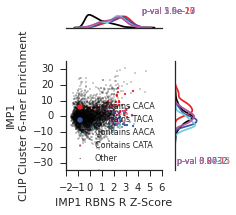

In [45]:
plot_bindnseq(igf2bp1_zscore, 
              reprocessed_kmer_dict['S05_01_overlapped_with_S01_01.l10_0_l2f_0.bed'].ix['three_prime_utrs'],
              os.path.join(img_dir,'{}_{}.svg'.format("three_prime_utrs", "S05_01_overlapped_with_S01_01.l10_0_l2f_0.fixed.bed")), 
              motifs=['CACA', 'TACA', 'AACA', 'CATA'], name="IMP1", 
              colors=['#EB2526', '#3856A1', '#74CCD7', '#BA509B'],
              ylim=35
             )

2_NoIndex_L002_R1.R16.polyATrim.adapterTrim.rmRep.rg.sorted.rmDup.sorted.peaks.bed
(-10.0, 20.0)
(-2.0, 7.0)
(-4.0, 8.0)
(-2.0, 5.0)
(-3.0, 7.0)
(-10.0, 20.0)


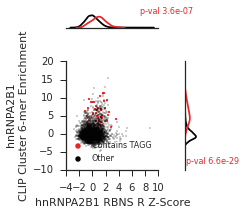

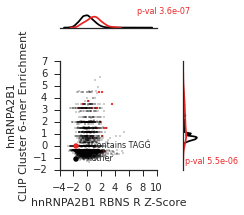

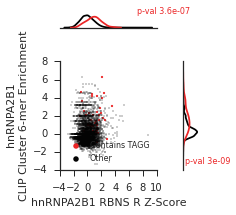

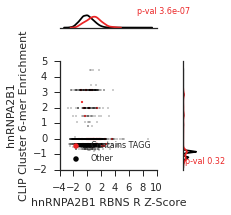

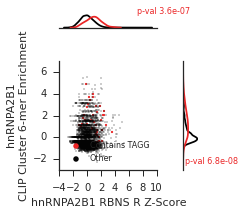

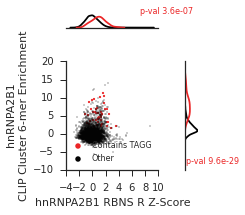

In [160]:
img_dir = "/nas3/gpratt/Dropbox/hnRNPA2:B1/rbns"
for name, kmers in hnrnpa2b1_kmer_dict.items():
    print name
    cur_zscore = hnrnpa2b1_zscore
    output_name = "hnRNPA2B1"
    save_all_plots(kmers, 
               cur_zscore,
               name,
               output_name,
               motifs=['TAGG'], 
               colors=['#EB2526'], 
               img_dir=img_dir)

In [55]:
joined = pd.concat([igf2bp1_zscore, igf2bp1_kmers.delta.unstack().T], axis=1)
joined.to_csv("kmer_enrichment.csv", sep="\t")
!scp kmer_enrichment.csv tscc-login.sdsc.edu:/home/gpratt/projects/imp_family/analysis/ad-hoc

kmer_enrichment.csv                           100%  567KB 566.7KB/s   00:00    


In [56]:
joined = pd.concat([igf2bp1_zscore, igf2bp1_old_kmers.delta.unstack().T], axis=1)
joined.to_csv("kmer_old_enrichment.csv", sep="\t")
!scp kmer_old_enrichment.csv tscc-login.sdsc.edu:/home/gpratt/projects/imp_family/analysis/ad-hoc
    


kmer_old_enrichment.csv                       100%  564KB 563.6KB/s   00:00    


In [ ]:
joined = pd.concat([igf2bp1_zscore, igf2bp1_enriched_kmers.delta.unstack().T], axis=1)
joined.to_csv("kmer_enriched_enrichment.csv", sep="\t")
!scp kmer_enriched_enrichment.csv tscc-login.sdsc.edu:/home/gpratt/projects/imp_family/analysis/ad-hoc

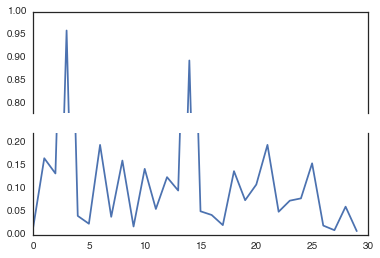

In [90]:
"""
Broken axis example, where the y-axis will have a portion cut out.
"""
import matplotlib.pyplot as plt
import numpy as np


# 30 points between 0 0.2] originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
sns.despine(ax=ax2)
sns.despine(ax=ax, bottom=True)

In [94]:
def plot_bindnseq(zscore, kmer, img_path, motifs=["GGTA"], name="", colors=['r']):
    num_rows = 4
    num_cols = 4
    
    if type(motifs) == str or colors == str:
        color = ['r']
        motifs = [motifs]
        
    with dataviz.Figure(img_path, figsize=(3.0, 3.0)) as fig:
        gs = gridspec.GridSpec(num_rows, num_cols)

        joined = pd.concat([kmer.delta, zscore], axis=1)
        joined.columns = ['kmer', 'rbns']
        
        ax = fig.add_subplot(gs[0, 0:3])

        sns.kdeplot(joined['rbns'], ax=ax, color='k')
        for motif, color in zip(motifs, colors):
            filtered = joined[[motif in item for item in joined.index]]
            sns.kdeplot(filtered['rbns'], ax=ax, color=color)
            ax.text(.8, 1, "p-val {:.2}".format(ks_2samp(joined['rbns'], filtered['rbns'])[1]),
                    transform=ax.transAxes, fontsize=8, color=color)

        legend = ax.legend()
        legend.remove()
        ax.set_yticks([])
        ax.set_xticks([])
        sns.despine(ax=ax, left=True)
        [tick.set_fontsize(8) for tick in ax.get_xticklabels()]

        ax = fig.add_subplot(gs[1:4, 3])
        sns.kdeplot(joined['kmer'], ax=ax, vertical=True, color='k')
        for motif, color in zip(motifs, colors):
            filtered = joined[[motif in item for item in joined.index]]
            #sns.kdeplot(filtered['rbns'], ax=ax, color=color)
            sns.kdeplot(filtered['kmer'], ax=ax, vertical=True, color=color)
            ax.text(.1,.05, "p-val {:.2}".format(ks_2samp(joined['kmer'], filtered['kmer'])[1]),
                    transform=ax.transAxes, fontsize=8, color=color)

        ax.set_xticks([])
        ax.set_yticks([])
        legend = ax.legend()
        legend.remove()
        sns.despine(ax=ax, bottom=True)
        [tick.set_fontsize(8) for tick in ax.get_xticklabels()]
        
        outliers = fig.add_subplot(gs[1,0:3])
        main_points = fig.add_subplot(gs[2:4,0:3])
        
        line1 = main_points.scatter(joined['rbns'], joined['kmer'], alpha=.5, color='k', s=1, label="Other", 
                           #rasterized=True
                          )
        
        for motif, color in zip(motifs, colors):
            filtered = joined[[motif in item for item in joined.index]]
            line2 = main_points.scatter(filtered['rbns'], 
                               filtered['kmer'],
                               alpha=.5, 
                               s=5, 
                               label="Contains {}".format(motif),
                               color=color,
                               #rasterized=True
                          )
        main_points.set_ylabel(name + "\nCLIP Cluster 6-mer Enrichment")
        lgnd = main_points.legend(loc=4, scatterpoints=1, fontsize=8)
        #ax.set_xticks([])
        main_points.set_xlabel(name + " RBNS R Z-Score")

        sns.despine(ax=main_points)
        lgnd.legendHandles[0]._sizes = [30]
        lgnd.legendHandles[1]._sizes = [30] 

In [ ]:
foo = reprocessed_kmer_dict['S05_01_overlapped_with_S01_01.l10_5_l2f_4.bed'].ix['all'].copy()
std = foo.sort(columns="delta").delta.std() * 10
foo[~(np.abs(foo.delta) < std)]

In [64]:
foo = reprocessed_kmer_dict['S05_01_overlapped_with_S01_01.l10_5_l2f_4.bed'].ix['all']

In [ ]:
print "foo"

In [ ]:
joined = pd.concat([kmer.delta, igf2bp1_zscore], axis=1)
joined.columns = ['kmer', 'rbns']